In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('assessment_da25.csv')

data.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [94]:
# Checking the sample size
sample_sizes = data['Variant'].value_counts()
print(sample_sizes)

Variant
A    1000
B    1000
Name: count, dtype: int64


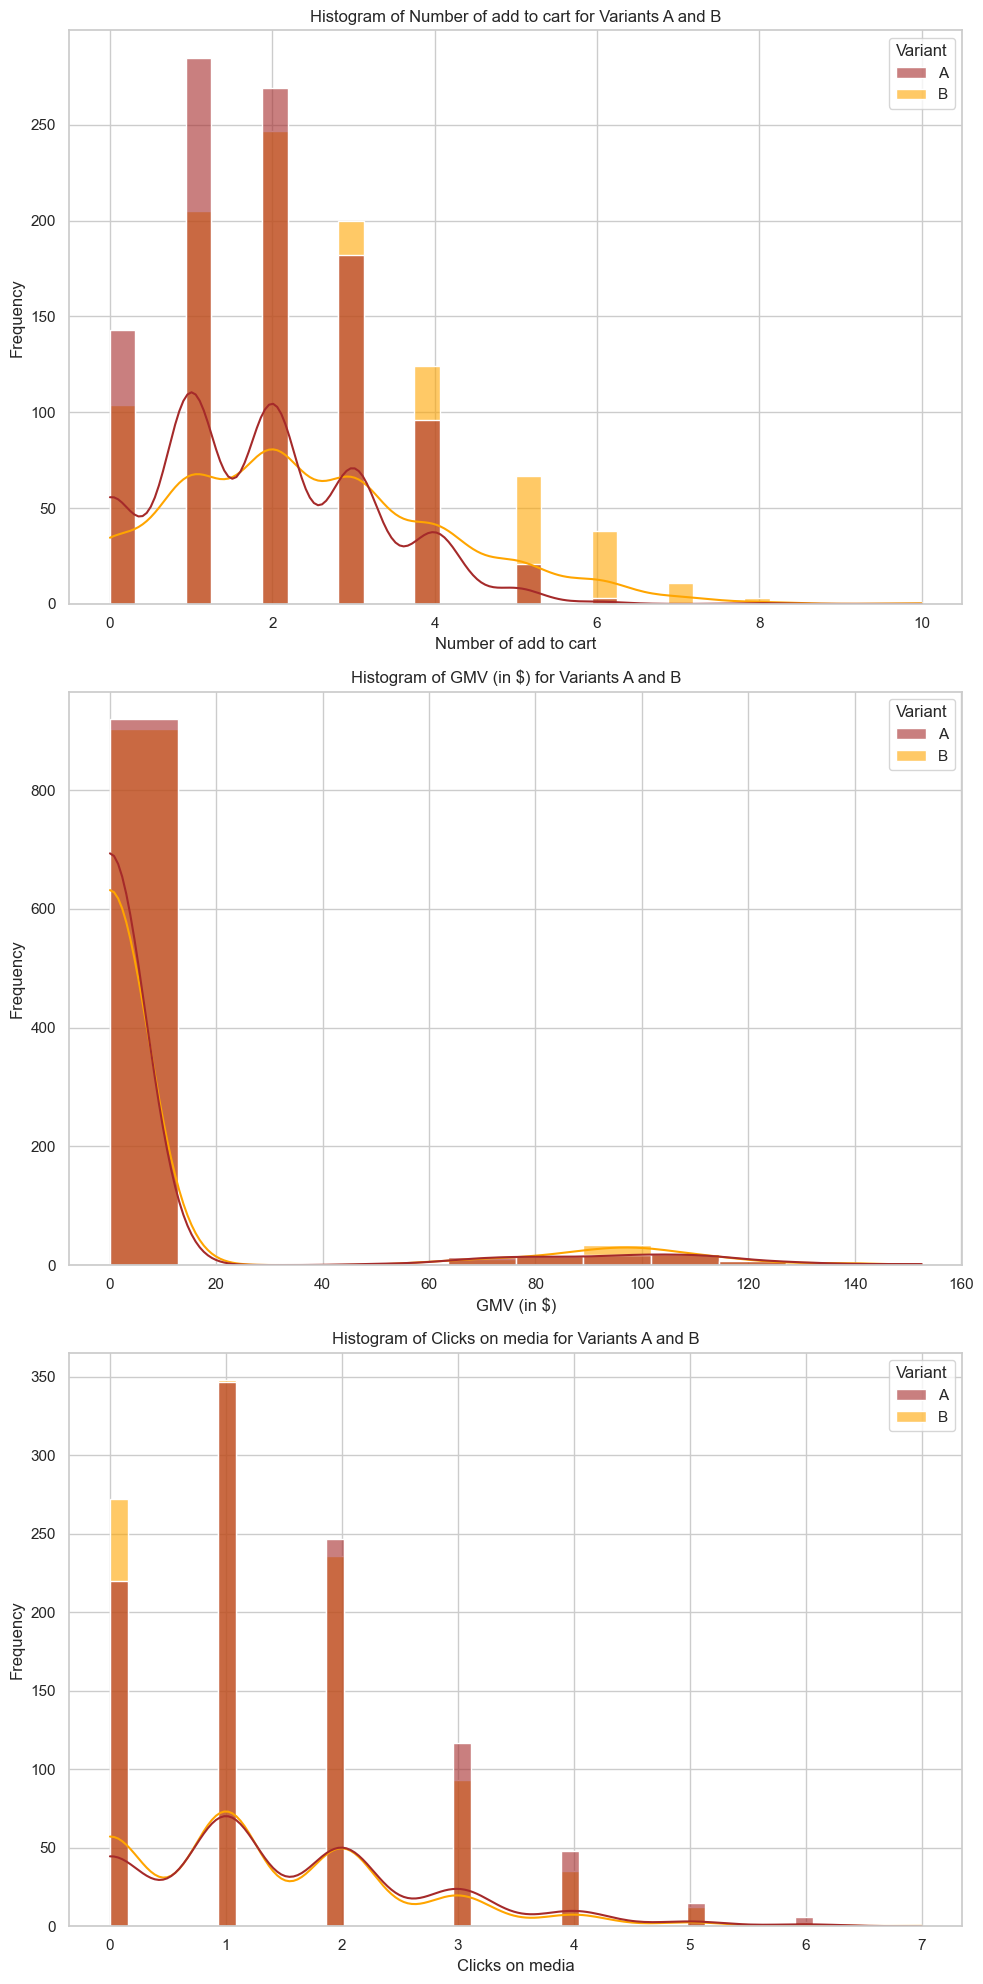

In [97]:
sns.set(style="whitegrid")

# Creating a figure to hold the plots
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# List of metrics to plot
metrics = ['Number of add to cart', 'GMV (in $)', 'Clicks on media']

# Creatinh a histogram for each
for i, metric in enumerate(metrics):
    sns.histplot(data=data, x=metric, hue="Variant", kde=True, ax=axs[i], palette=['brown', 'orange'], alpha=0.6)
    axs[i].set_title(f'Histogram of {metric} for Variants A and B')
    axs[i].set_xlabel(metric)
    axs[i].set_ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()
plt.show()

In [98]:
# Calculatng the distribution attributes for each metric by variant
distribution_attributes = {}

for metric in metrics:
    distribution_attributes[metric] = {}
    for variant in data['Variant'].unique():
        subset = data[data['Variant'] == variant][metric]
        distribution_attributes[metric][variant] = {
            'mean': subset.mean(),
            'std_dev': subset.std(),
            'variance': subset.var(),
            'skewness': subset.skew(),
            'kurtosis': stats.kurtosis(subset, fisher=True)  # Fisher=True for excess kurtosis
        }

# Converting the results to amore readable table
attributes_df = pd.DataFrame.from_dict({(i, j): distribution_attributes[i][j] 
                                        for i in distribution_attributes.keys() 
                                        for j in distribution_attributes[i].keys()},
                                       orient='index')

attributes_df

mean    std_dev    variance  skewness   kurtosis
Number of add to cart A  1.88400   1.297778    1.684228  0.497011  -0.024845
                      B  2.46900   1.660662    2.757797  0.646403   0.273362
GMV (in $)            A  7.68999  26.794816  717.962156  3.386732  10.130062
                      B  9.28953  28.879687  834.036341  2.909346   6.851278
Clicks on media       A  1.49500   1.230239    1.513488  0.863206   0.657512
                      B  1.32400   1.180855    1.394418  0.989218   1.164311

In [99]:
# Extracting the data for the two variants for each metric
add_to_cart_A = data[data['Variant'] == 'A']['Number of add to cart']
add_to_cart_B = data[data['Variant'] == 'B']['Number of add to cart']

gmv_A = data[data['Variant'] == 'A']['GMV (in $)']
gmv_B = data[data['Variant'] == 'B']['GMV (in $)']

clicks_on_media_A = data[data['Variant'] == 'A']['Clicks on media']
clicks_on_media_B = data[data['Variant'] == 'B']['Clicks on media']

# Performing the two-sample t-test for each metric
t_stat_add_to_cart, p_value_add_to_cart = stats.ttest_ind(add_to_cart_A, add_to_cart_B)
t_stat_gmv, p_value_gmv = stats.ttest_ind(gmv_A, gmv_B)
t_stat_clicks_on_media, p_value_clicks_on_media = stats.ttest_ind(clicks_on_media_A, clicks_on_media_B)

(t_stat_add_to_cart, p_value_add_to_cart), (t_stat_gmv, p_value_gmv), (t_stat_clicks_on_media, p_value_clicks_on_media)

((-8.777389396187946, 3.517078745065221e-18),
 (-1.2839539769831623, 0.19930692918202245),
 (3.1710702328903153, 0.0015418189281850277))